# Подсчёт pi с использованием метода Монте-Карло

## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Инициализация количества "бросков"
num_points = 1000

In [3]:
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "yellow"))
    else:
        points.append((x, y, "purple"))

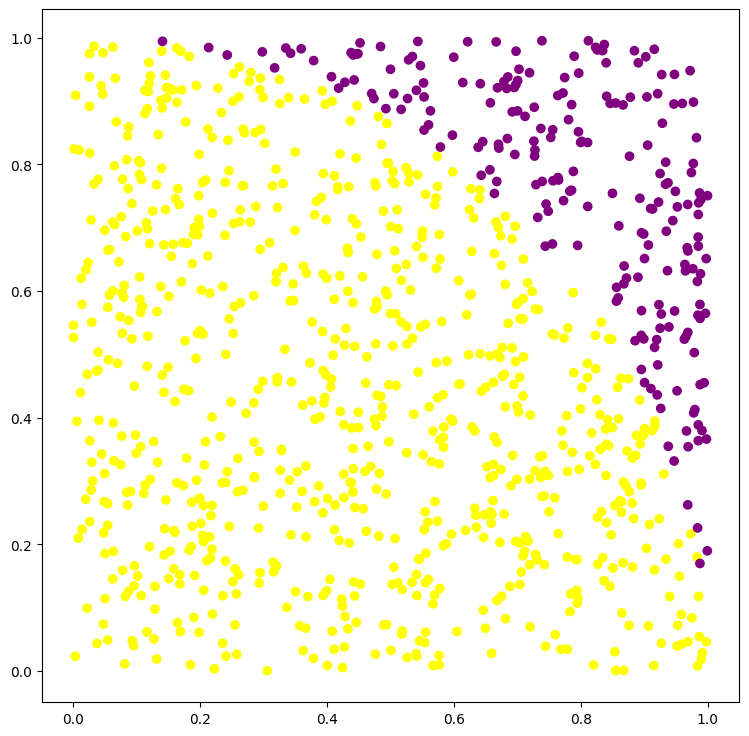

In [4]:
# Распакуем точки в 3 списка
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots() 
fig.set_size_inches(9.0, 9.0)
# Рисуем результат
ax.scatter(x, y, c=colors)

In [5]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

3.14

In [6]:
import random

from ipywidgets import interact, widgets

%matplotlib inline
from matplotlib import pyplot

def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

In [18]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

Можете ли вы назвать другие интересные варианты использования виджетов?
Ответ:
 
- Button - кнопка, которую можно нажимать и реагировать на события нажатия.WidgetEvents 
 
- Checkbox - флажок, который можно выбирать или снимать. WidgetList
 
- Dropdown - выпадающий список, из которого можно выбрать один из вариантов. WidgetList
 
- RadioButtons - набор радио-кнопок, из которых можно выбрать один вариант. WidgetEvents
 
- Slider - ползунок, который можно перемещать для выбора значения из диапазона. WidgetSlider
 
- Output - контейнер для вывода результатов вычислений или графиков. WidgetOutput

- Всплывающее окно. Widget PopUpфиков.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
    x, y = noisy_gaussian()
    yfit = fit(x, y, n=5) # fit a 5th order polynomial to it
    plot(x, y, yfit)

In [9]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
    x, y = noisy_gaussian()
@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def step():
    import random
    return 1. if random.random() > .5 else -1.

In [12]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [13]:
n = 100000
x = walk(n)

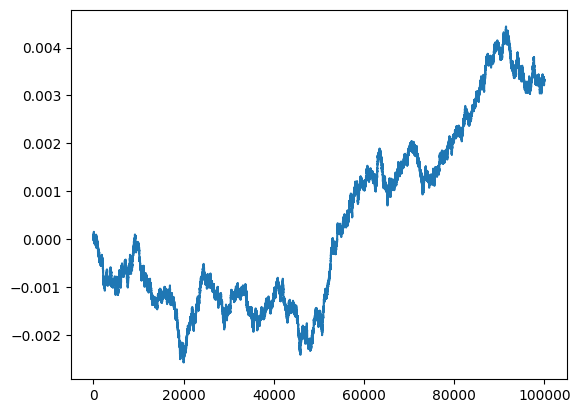

In [14]:
import matplotlib.pyplot as plt
plt.plot(x);

In [15]:
t1 = %timeit -o walk(n)

46.5 ms ± 846 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
t1.best


0.04548789999971632

In [17]:
%%prun
walk(n)

         200003 function calls in 0.112 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.065    0.065    0.112    0.112 2505900611.py:1(walk)
    99999    0.039    0.000    0.047    0.000 1062327543.py:1(step)
    99999    0.008    0.000    0.008    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.112    0.112 {built-in method builtins.exec}
        1    0.000    0.000    0.112    0.112 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

Можете ли вы заметить небольшую ошибку, которая замедляет работу кода?

Ответ: 
- Основное отличие между np.zeros() и np.empty() заключается во времени выполнения. 
Функция np.zeros() заполняет массив нулями, что может быть затратным по времени, особенно при создании 
больших массивов. С другой стороны, функция np.empty() не выполняет никаких операций заполнения значениями, поэтому 
создание массива с помощью этой функции происходит быстрее.